In [4]:
library(haven)
library(tidyverse)
#install.packages('car')
library(car)
#install.packages('lmtest')
library(lmtest)
scores <- read_sas("/content/mvreg.sas7bdat", NULL)
head(scores)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




LOCUS_OF_CONTROL,SELF_CONCEPT,READ,WRITE,SCIENCE,MOTIVATION,PROG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.1439546,0.7226413,37.40555,39.03284,33.53282,0.368973076,2
0.5041339,0.1113640,52.76078,51.99504,65.22504,0.520318508,2
1.6285460,0.6299338,59.77192,54.65165,64.60450,0.436838150,2
0.3680964,-0.1385281,42.85432,41.12136,48.49381,-0.004323991,3
-0.2801896,-0.4522264,54.75628,49.94721,50.38166,1.256924033,2
1.0667162,0.6229352,56.59180,58.27413,61.51582,1.355576158,2


## Linear regression

Let's start by creating a correlation matrix to help select the explanatory variables of our linear regression model.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



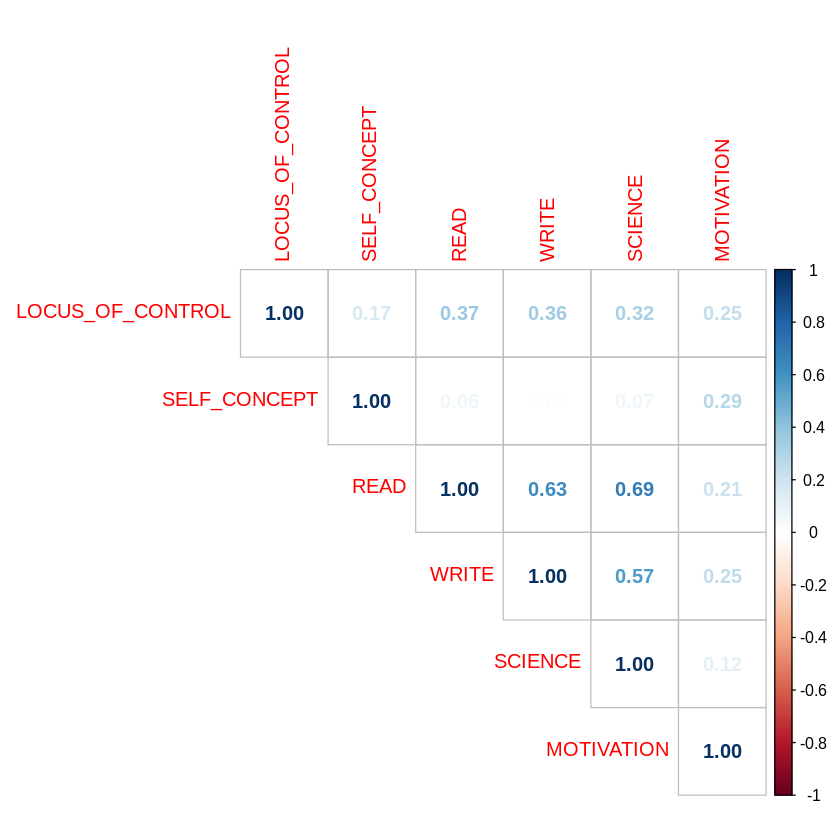

In [6]:
install.packages('corrplot')
library(corrplot)
x <- cor(scores[,c(1,2,3,4,5,6)], y = NULL, method = c("pearson"))
corrplot(x, type='upper', method = 'number')

Let's begin by constructing a model of the dependence of the READ variable on the SCIENCE variable.

In [7]:
lm_w1 <- lm(READ~SCIENCE, data = scores)
summary (lm_w1)


Call:
lm(formula = READ ~ SCIENCE, data = scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5012  -5.0050  -0.2407   5.1321  22.4088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.68764    1.62103   9.061   <2e-16 ***
SCIENCE      0.71893    0.03078  23.357   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.312 on 598 degrees of freedom
Multiple R-squared:  0.4771,	Adjusted R-squared:  0.4762 
F-statistic: 545.5 on 1 and 598 DF,  p-value: < 2.2e-16


Now let's add another quantitative variable - the LOCUS_OF_CONTROL variable.

In [8]:
lm_w2 <- lm(READ~SCIENCE+LOCUS_OF_CONTROL, data = scores)
summary (lm_w2)


Call:
lm(formula = READ ~ SCIENCE + LOCUS_OF_CONTROL, data = scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.2361  -4.6577  -0.1417   4.9262  23.0764 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      17.36465    1.65724  10.478  < 2e-16 ***
SCIENCE           0.66252    0.03178  20.844  < 2e-16 ***
LOCUS_OF_CONTROL  2.51625    0.46026   5.467 6.74e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.142 on 597 degrees of freedom
Multiple R-squared:  0.502,	Adjusted R-squared:  0.5003 
F-statistic: 300.9 on 2 and 597 DF,  p-value: < 2.2e-16


In [9]:
vif(lm_w2)

SCIENCE LOCUS_OF_CONTROL 
        1.117796         1.117796

The value of VIF is less than 5, so we can conclude that the variables are not collinear. Let's add another variable.

In [10]:
lm_w3 <- lm(READ~SCIENCE+LOCUS_OF_CONTROL+SELF_CONCEPT, data = scores)
summary (lm_w3)


Call:
lm(formula = READ ~ SCIENCE + LOCUS_OF_CONTROL + SELF_CONCEPT, 
    data = scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.3313  -4.6539  -0.2273   4.9210  22.9934 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      17.35153    1.65864  10.461  < 2e-16 ***
SCIENCE           0.66273    0.03181  20.834  < 2e-16 ***
LOCUS_OF_CONTROL  2.54814    0.46639   5.464 6.87e-08 ***
SELF_CONCEPT     -0.18248    0.42013  -0.434    0.664    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.146 on 596 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.4996 
F-statistic: 200.4 on 3 and 596 DF,  p-value: < 2.2e-16


The SELF_CONCEPT variable is not relevant, so we will not include it in our model.

In [11]:
vif(lm_w3)

SCIENCE LOCUS_OF_CONTROL     SELF_CONCEPT 
        1.118058         1.146196         1.030431

Let's add the WRITE variable.

In [12]:
lm_w4 <- lm(READ~SCIENCE+LOCUS_OF_CONTROL+WRITE, data = scores)
summary (lm_w4)


Call:
lm(formula = READ ~ SCIENCE + LOCUS_OF_CONTROL + WRITE, data = scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.5970  -4.5011  -0.2093   4.8163  21.7680 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.72840    1.78849   4.880 1.36e-06 ***
SCIENCE           0.49324    0.03450  14.299  < 2e-16 ***
LOCUS_OF_CONTROL  1.57332    0.44004   3.575 0.000378 ***
WRITE             0.33387    0.03488   9.571  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.654 on 596 degrees of freedom
Multiple R-squared:  0.5683,	Adjusted R-squared:  0.5662 
F-statistic: 261.6 on 3 and 596 DF,  p-value: < 2.2e-16


In [13]:
vif(lm_w4)

SCIENCE LOCUS_OF_CONTROL            WRITE 
        1.516445         1.176781         1.557193

In [14]:
lm_w5 <- lm(READ~SCIENCE+LOCUS_OF_CONTROL+WRITE+MOTIVATION, data = scores)
summary (lm_w5)


Call:
lm(formula = READ ~ SCIENCE + LOCUS_OF_CONTROL + WRITE + MOTIVATION, 
    data = scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4993  -4.3795  -0.2473   4.7669  20.9160 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       9.19252    1.80126   5.103 4.49e-07 ***
SCIENCE           0.49750    0.03449  14.423  < 2e-16 ***
LOCUS_OF_CONTROL  1.42205    0.44625   3.187  0.00151 ** 
WRITE             0.32104    0.03546   9.054  < 2e-16 ***
MOTIVATION        0.65867    0.34690   1.899  0.05808 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.64 on 595 degrees of freedom
Multiple R-squared:  0.5709,	Adjusted R-squared:  0.5681 
F-statistic: 197.9 on 4 and 595 DF,  p-value: < 2.2e-16


In [15]:
vif(lm_w5)

SCIENCE LOCUS_OF_CONTROL            WRITE       MOTIVATION 
        1.522878         1.215523         1.615936         1.105780

In [16]:
lm_w6 <- lm(READ~SCIENCE+LOCUS_OF_CONTROL+WRITE+MOTIVATION+PROG, data = scores)
summary (lm_w6)


Call:
lm(formula = READ ~ SCIENCE + LOCUS_OF_CONTROL + WRITE + MOTIVATION + 
    PROG, data = scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6695  -4.4456  -0.2696   4.8494  21.0017 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.82715    1.96942   4.482 8.87e-06 ***
SCIENCE           0.49745    0.03452  14.412  < 2e-16 ***
LOCUS_OF_CONTROL  1.39886    0.44938   3.113  0.00194 ** 
WRITE             0.32094    0.03548   9.045  < 2e-16 ***
MOTIVATION        0.61460    0.36008   1.707  0.08837 .  
PROG              0.17974    0.39040   0.460  0.64539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.644 on 594 degrees of freedom
Multiple R-squared:  0.5711,	Adjusted R-squared:  0.5675 
F-statistic: 158.2 on 5 and 594 DF,  p-value: < 2.2e-16


In [17]:
vif(lm_w6)

SCIENCE LOCUS_OF_CONTROL            WRITE       MOTIVATION 
        1.522891         1.230995         1.615995         1.189847 
            PROG 
        1.119678

The PROG variable is irrelevant, so we will focus on the lm_w5 model.

### Assumptions

#### 1. Linear independence between independent variables.

We use the VIF coefficient to test the collinearity between the independent variables. We want the VIF of the model to be as close as possible to 1 and less than 5. We calculated this coefficient directly under the model, but let's recall it.

In [18]:
vif(lm_w5)

SCIENCE LOCUS_OF_CONTROL            WRITE       MOTIVATION 
        1.522878         1.215523         1.615936         1.105780

VIF is less than $1.7$ so we can conclude that the independent variables are noncollinear.

#### 2. Normality of residuals.

To test the normality of the residuals we will use a histogram, a quantile-quantile plot and the Shapiro-Wilk test. Let's begin with visual methods.

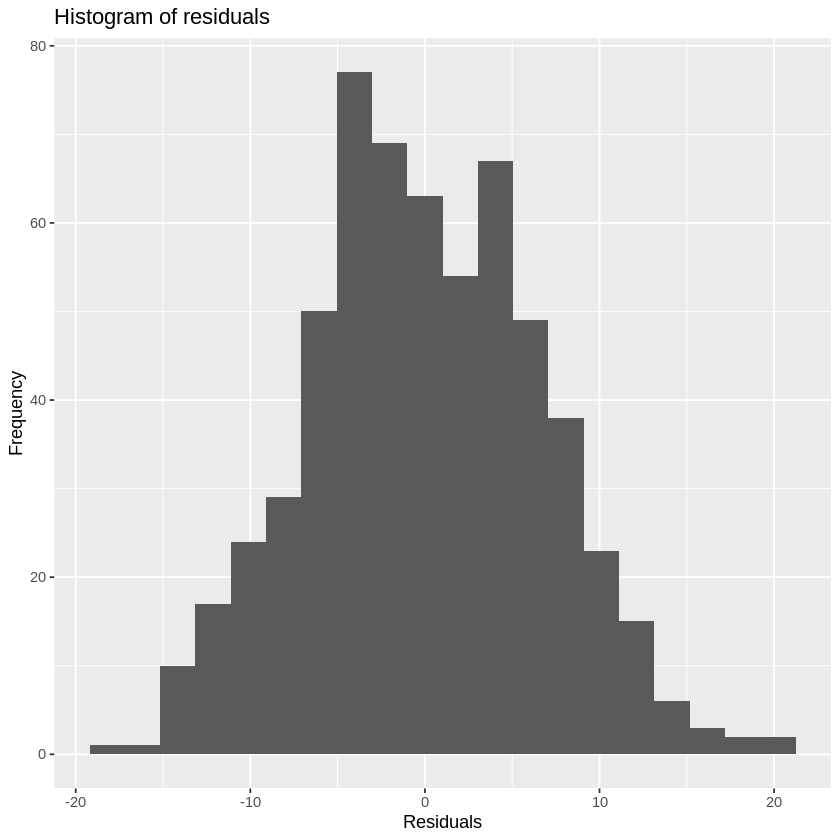

In [19]:
ggplot(lm_w5, aes(x=.resid)) + geom_histogram(bins=20) + labs(title='Histogram of residuals', x='Residuals', y='Frequency')

We can see that the histogram is shaped like a normal distribution. We can also make a quantile-quantile plot.

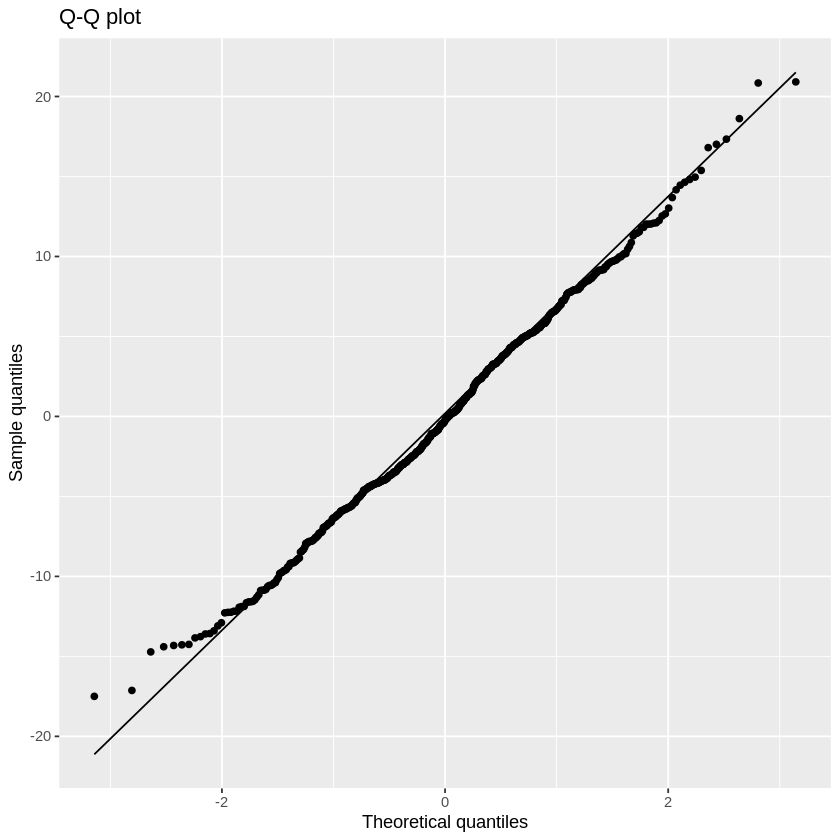

In [20]:
ggplot(lm_w5, aes(sample=.resid)) + geom_qq() + geom_qq_line() + labs(title='Q-Q plot', x='Theoretical quantiles', y='Sample quantiles')

We see that there are no significant deviations from the straight line.

Let's check the normality of the residuals with the Shapiro-Wilk test, where $H_0:$ The population has a normal distribution.

In [21]:
shapiro.test(lm_w5$residuals)


	Shapiro-Wilk normality test

data:  lm_w5$residuals
W = 0.99613, p-value = 0.15


For a significance level of $0.05$, we have no grounds to reject the null hypothesis.

All the methods we used prove that the residuals of our model have a normal distribution.

#### 3. Zero mean of the residuals.

To test the null mean of the residuals, we will use the T-student test.

In [22]:
t.test(lm_w5$residuals)


	One Sample t-test

data:  lm_w5$residuals
t = -5.9113e-17, df = 599, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5305925  0.5305925
sample estimates:
    mean of x 
-1.597048e-17 


With a Student's t-test we test $H_0$: the value of the mean of the residuals of the model is equal to 0.

In our case, the t-test showed that we have no grounds to reject $H_0$.

#### 4. Independence of residuals.

To verify the independence of the residuals, we will make the 'Residuals vs Fitted' plot.

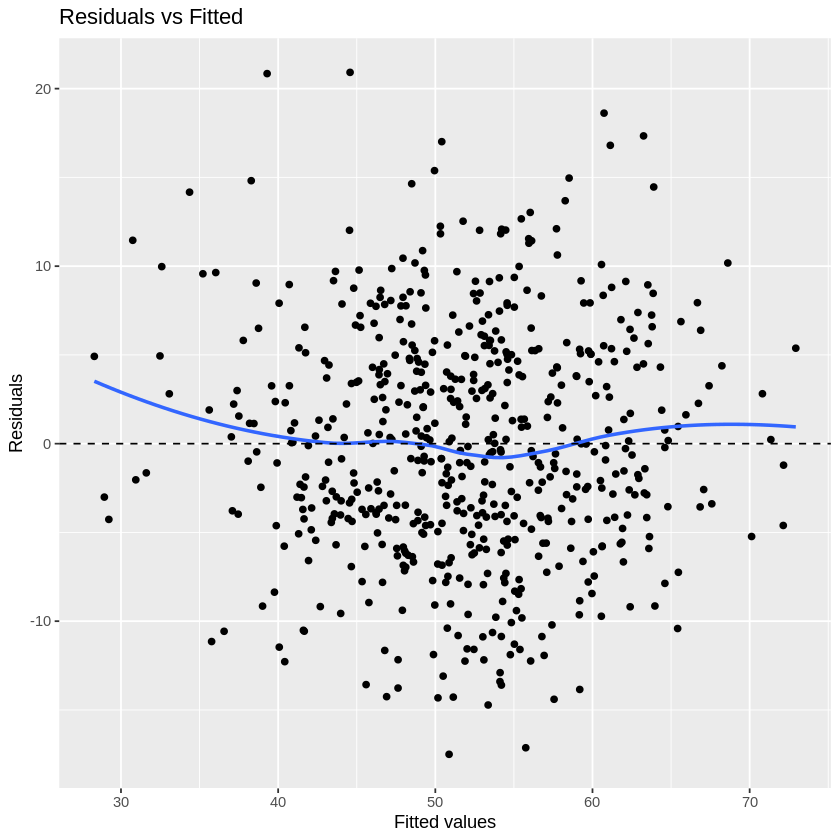

In [23]:
ggplot(lm_w5, aes(.fitted, .resid)) + geom_point() + stat_smooth(method='loess', formula=y~x, se=FALSE) + 
  geom_hline(yintercept=0, linetype='dashed') + labs(title='Residuals vs Fitted', x='Fitted values', y='Residuals')

In the plot, we can observe only small deviations.

We will also use the Durbin-Watson test to test the independence of the residuals, where $H_0$: There is no autoregressive structure in the model.

In [24]:
dwtest(lm_w5)


	Durbin-Watson test

data:  lm_w5
DW = 2.0615, p-value = 0.7737
alternative hypothesis: true autocorrelation is greater than 0


In our case, $p-value >0.05$, so we have no reason to reject the null hypothesis.This means that we can assume that the assumption of independence of residuals is fulfilled.

#### 5. Homoscedasticity.

We will use the 'Scale-Location' plot to examine Homoscedasticity.

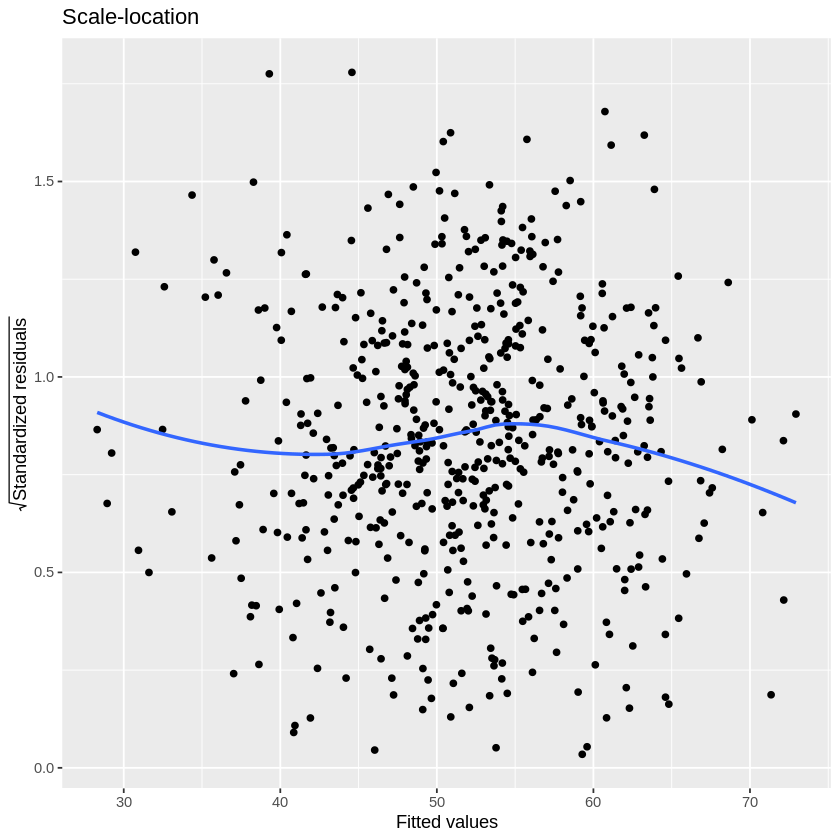

In [28]:
ggplot(lm_w5, aes(.fitted, sqrt(abs(.stdresid)))) + geom_point() + stat_smooth(method='loess', formula=y~x, se=FALSE) +
  labs(title='Scale-location', x='Fitted values', y=expression(sqrt('Standardized residuals')))

We could conclude about homoskedasticity, but we will verify it using the Breusch-Pagan test, where $H_0$: The residuals are homoscedastic.

In [29]:
bptest(lm_w5)


	studentized Breusch-Pagan test

data:  lm_w5
BP = 1.6601, df = 4, p-value = 0.7979


We obtained $p-value > 0.05$, so we have no grounds to reject the null hypothesis that homoskedasticity of the residuals has occurred. 

## ANOVA

PROG - values (1-3).

In [30]:
scores <- scores %>% dplyr::mutate(PROG = as.factor(PROG))
head(scores)

LOCUS_OF_CONTROL,SELF_CONCEPT,READ,WRITE,SCIENCE,MOTIVATION,PROG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.1439546,0.7226413,37.40555,39.03284,33.53282,0.368973076,2
0.5041339,0.1113640,52.76078,51.99504,65.22504,0.520318508,2
1.6285460,0.6299338,59.77192,54.65165,64.60450,0.436838150,2
0.3680964,-0.1385281,42.85432,41.12136,48.49381,-0.004323991,3
-0.2801896,-0.4522264,54.75628,49.94721,50.38166,1.256924033,2
1.0667162,0.6229352,56.59180,58.27413,61.51582,1.355576158,2


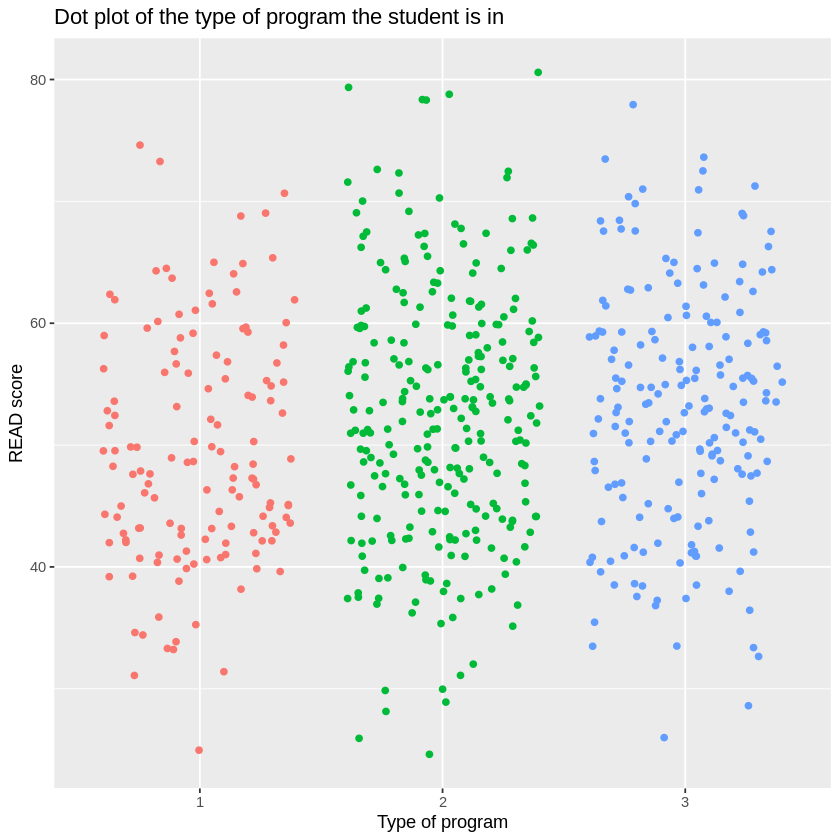

In [33]:
ggplot(scores, aes(x=PROG, y=READ)) + geom_point(aes(color=PROG), position='jitter') + 
labs(title = 'Dot plot of the type of program the student is in', x='Type of program', y='READ score') + theme(legend.position = 'none')

From this plot, it is difficult to conclude that there are significant differences between the reading exam scores for different learning modes. So let's make a box plot.

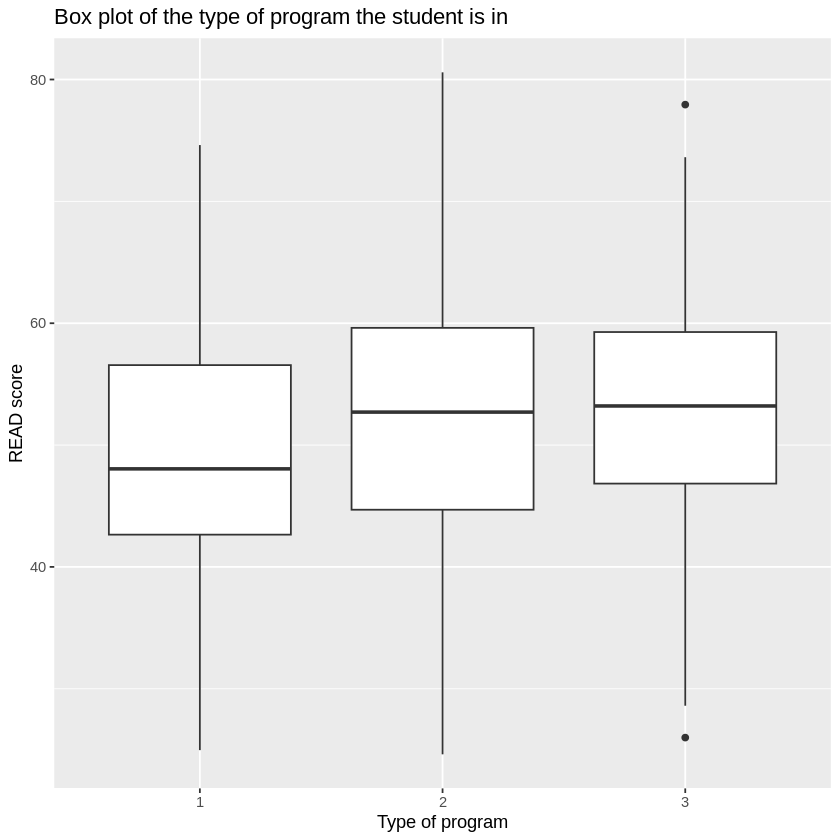

In [34]:
ggplot(scores, aes(x=PROG, y=READ, group=PROG)) + geom_boxplot() + 
labs(title = 'Box plot of the type of program the student is in', x='Type of program', y='READ score')

In this graph, we can see that the 2nd and 3rd learning modes have a visibly larger median than the 1st mode, which may suggest that these learning programs result in a better exam score.

Before performing the analysis of variance, let's check the assumptions.

#### 1. Normality assumption.

We test the normality of the sample using the Shapiro-Wilk test and histogram observations.

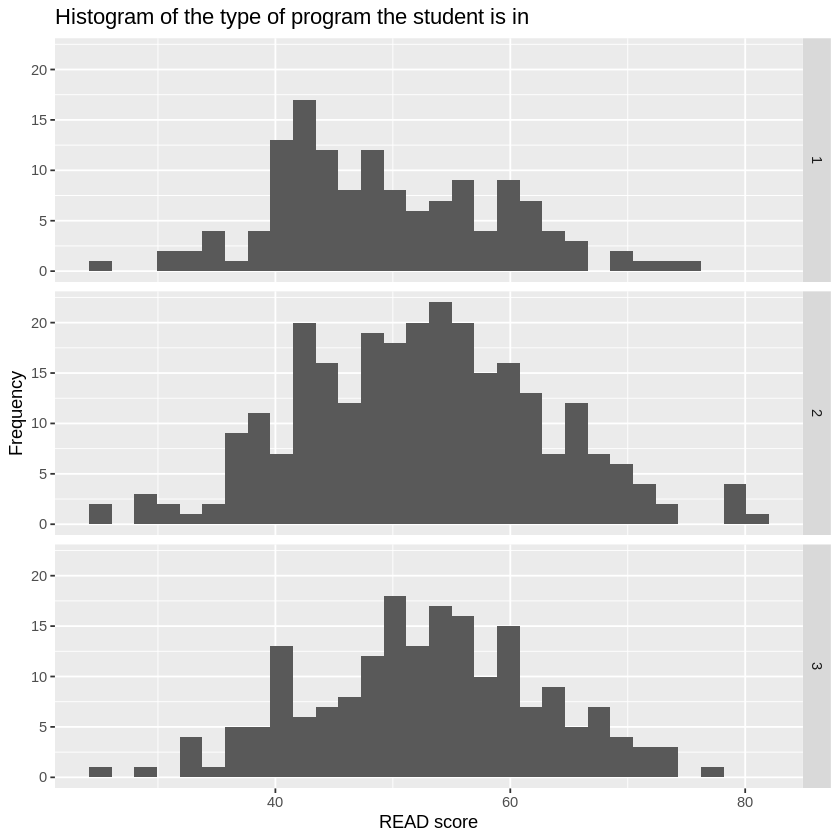

In [35]:
ggplot(scores, aes(x=READ)) + geom_histogram(bins=30) + 
labs(title='Histogram of the type of program the student is in', x='READ score',
y = 'Frequency') + facet_grid(PROG ~.)

Histograms 2 and 3 visually are close to a normal distribution, but let's still check it with the Shapiro-Wilk test, where $H_0:$ Population has a normal distribution.

In [36]:
s_1 <- scores$READ[which(scores$PROG=='1')]
shapiro.test(s_1)


	Shapiro-Wilk normality test

data:  s_1
W = 0.98188, p-value = 0.0639


In [37]:
s_2 <- scores$READ[which(scores$PROG=='2')]
shapiro.test(s_2)


	Shapiro-Wilk normality test

data:  s_2
W = 0.99612, p-value = 0.7431


In [38]:
s_3 <- scores$READ[which(scores$PROG=='3')]
shapiro.test(s_3)


	Shapiro-Wilk normality test

data:  s_3
W = 0.99496, p-value = 0.7725


For all 3 groups, we have no grounds to reject the null hypothesis because p-value > 0.05. So let's move on to examine the next assumption.

#### 2 Homogeneity of variance.

To test whether the variance is constant in each group, we will use the Bartlett test, since we have previously shown that the populations have a normal distribution. The null hypothesis is $H_0: \sigma_1^2=\sigma_2^2=\ldots=\sigma_k^2$. The alternative hypothesis is that at least one of the variances is different from the others.

In [39]:
bartlett.test(READ ~ PROG, data=scores)


	Bartlett test of homogeneity of variances

data:  READ by PROG
Bartlett's K-squared = 1.5588, df = 2, p-value = 0.4587


We see that we have no grounds to reject the null hypothesis.

Moreover, the assumption that the data must be independent is met.

We can proceed to perform the analysis of variance.

In [40]:
anova1 <- aov(READ ~ PROG, data=scores)
summary(anova1)

             Df Sum Sq Mean Sq F value  Pr(>F)   
PROG          2   1111   555.6   5.526 0.00419 **
Residuals   597  60029   100.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The p-value is less than 0.05, so we reject the null hypothesis nd accept the alternative hypothesis saying that there is at least one mean that differs from the others. We can find out between which groups there are differences using the Tukey-Kramer test.

In [41]:
tk1 <- TukeyHSD(anova1)
show(tk1)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = READ ~ PROG, data = scores)

$PROG
         diff        lwr      upr     p adj
2-1 2.9867035  0.5228267 5.450580 0.0126233
3-1 3.4855627  0.8533362 6.117789 0.0055330
3-2 0.4988591 -1.7270180 2.724736 0.8583459



we can see that there are significant differences between groups 2-1 and 3-1. For learning mode 3 and 2, we can see no significant differences in the exam score.

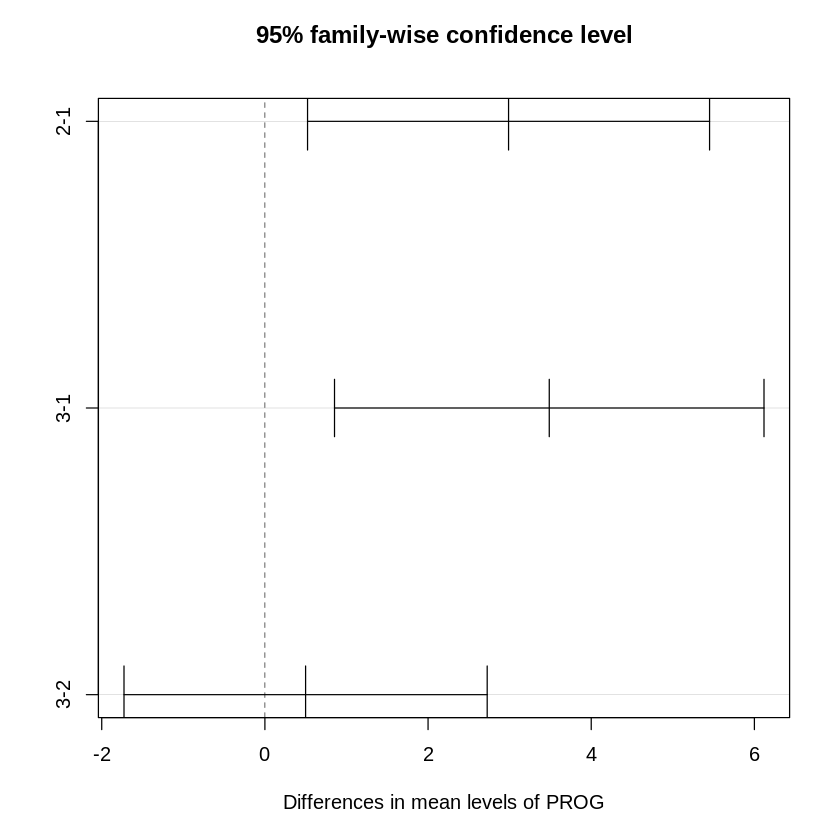

In [42]:
plot(tk1)

So we notice that the change of the study mode had an impact on the exam result, and the study method that brought the highest exam result is the 3rd study mode.